In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings('ignore')

In [16]:
# loading dataset into Pandas DataFrame
mql = pd.read_csv('olist_marketing_qualified_leads_dataset.csv')

In [17]:
close = pd.read_csv('olist_closed_deals_dataset.csv')

In [21]:
close.shape
#mql.shape

(842, 14)

In [5]:
orders = pd.read_csv('olist_orders_dataset.csv')

In [6]:
order_item = pd.read_csv('olist_order_items_dataset.csv')

In [7]:
product = pd.read_csv('olist_products_dataset.csv')

In [8]:
category = pd.read_csv('product_category_name_translation.csv')

In [9]:
mql.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [10]:
close.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [14]:
close.isna().sum()


mql_id                             0
seller_id                          0
sdr_id                             0
sr_id                              0
won_date                           0
business_segment                   1
lead_type                          6
lead_behaviour_profile           177
has_company                      779
has_gtin                         778
average_stock                    776
business_type                     10
declared_product_catalog_size    773
declared_monthly_revenue           0
dtype: int64

In [13]:
close

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0
5,b94fba7670eeb44dce2a0d8eb790e9f5,1c742ac33582852aaf3bcfbf5893abcf,fdb16d3cbbeb5798f2f66c4096be026d,495d4e95a8cf8bbf8b432b612a2aa328,2018-02-07 18:04:05,health_beauty,online_medium,NaN,NaN,NaN,NaN,manufacturer,NaN,0.0
6,c3e30ed7ac989117c7e1e719b4ac128f,92d7568ad0c5c76fd7d341b2d46f24d6,4b339f9567d060bcea4f5136b9f5949e,85fc447d336637ba1df43e793199fbc8,2018-04-16 18:18:22,computers,online_medium,wolf,NaN,NaN,NaN,reseller,NaN,0.0
7,b02c89251106e1fdd9d92744be9f94f2,44ed138eca6214d572ce1d813fb0049b,34d40cdaf94010a1d05b0d6212f9e909,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-17 17:01:57,health_beauty,offline,cat,NaN,NaN,NaN,manufacturer,NaN,0.0
8,a90a37898cc5f2718385a2fb981caaff,0b28859cd04d23edefee9c591fb03cd8,f42a2bd194f7802ab052a815c8de65b7,6565aa9ce3178a5caf6171827af3a9ba,2018-05-14 18:37:15,household_utilities,offline,eagle,NaN,NaN,NaN,reseller,NaN,0.0
9,0173e8d8b1d94a355b440fb67388f532,87d73636a3acf123e842bb890a4db036,9d12ef1a7eca3ec58c545c678af7869c,9e4d1098a3b0f5da39b0bc48f9876645,2018-04-24 03:00:00,household_utilities,online_medium,eagle,NaN,NaN,NaN,manufacturer,NaN,0.0


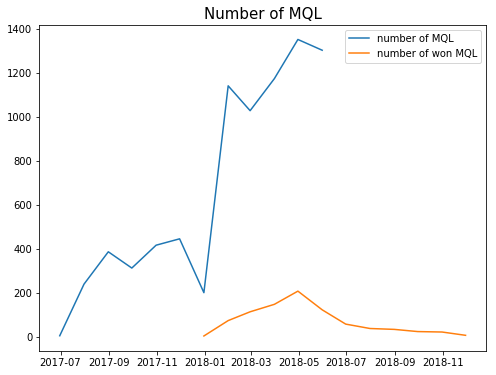

In [11]:
#Figure 1
num_mql = mql.set_index(pd.to_datetime(mql['first_contact_date']))
num_mql = num_mql.groupby(pd.Grouper(freq = "M")).count().drop(axis =1, columns = ["first_contact_date","landing_page_id", "origin"])
num_won = close.set_index(pd.to_datetime(close["won_date"]))
num_won = num_won.groupby(pd.Grouper(freq = "M")).count().drop(axis = 1, columns = ["seller_id", "sdr_id", "sr_id","business_segment", "lead_type", "lead_behaviour_profile", "has_company", "has_gtin", "average_stock", "business_type","declared_product_catalog_size",
 "declared_monthly_revenue", "won_date"])
plt.figure(figsize = (8,6))
plt.plot(num_mql.index, num_mql, "-", label = "number of MQL")
plt.plot(num_won.index, num_won, "-", label = "number of won MQL")
plt.legend()
plt.title("Number of MQL", size = 15)
plt.savefig("NumMQL.png")

In 2018, they boost the number of leads per month. Regarding the won MQL, its peak was at 05/2018 with 200 won opportunities.

### Number of MQL by channels overtime

                   mql_id
origin                   
direct_traffic        499
display               118
email                 493
organic_search       2296
other                 150
other_publicities      65
paid_search          1586
referral              284
social               1350
unknown              1099


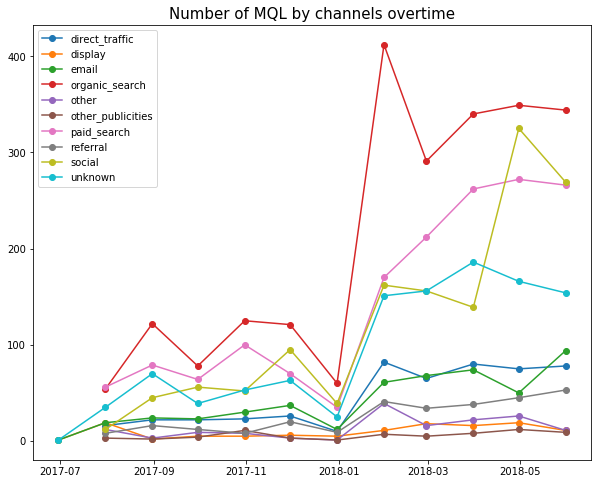

In [19]:
mql_origin = mql.groupby('origin').agg({'mql_id':"count"});print(mql_origin)
origin = list(mql_origin.index)
plt.figure(figsize = (10,8))
fancy_plot = plt.subplot()
for i in origin:
  channel = mql[mql['origin'] == i]
  channel = channel.set_index(pd.to_datetime(channel['first_contact_date']))
  channel_agg = channel.groupby(pd.Grouper(freq = "M")).count().drop(axis = 1, columns =["first_contact_date", 
 "landing_page_id", "origin"])
  fancy_plot.plot(channel_agg.index, channel_agg, "-o", label = i)
fancy_plot.legend()
plt.title('Number of MQL by channels overtime', size = 15)
plt.savefig("channel-mql.png")


The majority of MQLs come from organic_search channel, followed by direct traffic and social.

The organic_search MQL is significantly increased in 2018–02 and declined after that. This can be the result of a big event/PR campaign.

### Landing Page

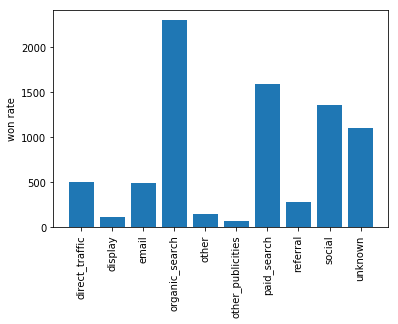

In [48]:
data = pd.merge(mql, close, how = "left", left_on = "mql_id", right_on = "mql_id")
origin_lost = data.groupby(['origin']).count().drop(axis = 1, columns =['first_contact_date','landing_page_id',
 'seller_id', 'sdr_id', 'sr_id', 'won_date',
 'business_segment',  'lead_behaviour_profile',
 'has_company', 'has_gtin', 'average_stock', 'business_type',
 'declared_product_catalog_size', 'declared_monthly_revenue'])
percentage = []
for i in origin:
 pct = origin_lost.loc[i][0]
 percentage.append(pct)
plt.figure(figsize = (6,4))
plt.bar(origin, percentage)
plt.xticks(rotation = 90)
plt.ylabel('won rate')
plt.savefig('won-rate.png')

From figure 4 above, there are few landing pages that have a very high number of MQLs

### Time for first order

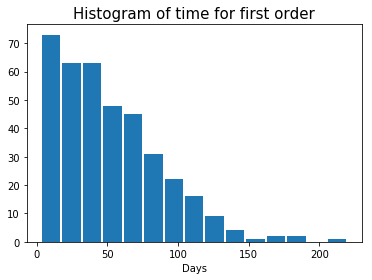

In [24]:

seller = pd.merge(order_item, orders[['order_id','order_approved_at']], how = "left", left_on = "order_id",right_on = "order_id")
seller['order_approved_at'] = pd.to_datetime(seller['order_approved_at'])

seller_first_order = seller.groupby('seller_id').agg({"order_approved_at":"min"})
diff = pd.merge(close, seller_first_order, how = "inner", left_on = "seller_id", right_index = True)
diff['first_order_time'] = diff['order_approved_at'] - pd.to_datetime(diff['won_date'])
diff['first_order_time'] = diff["first_order_time"].dt.days

#Histogram
plt.figure()
plt.hist(diff["first_order_time"], bins = 15, rwidth = 0.9)
plt.title("Histogram of time for first order",size = 15)
plt.xlabel("Days")
plt.show()

Most sellers have to wait less than 50 days to have the first order from Olist since the day they agree to join Olist platform

### Sales per segment

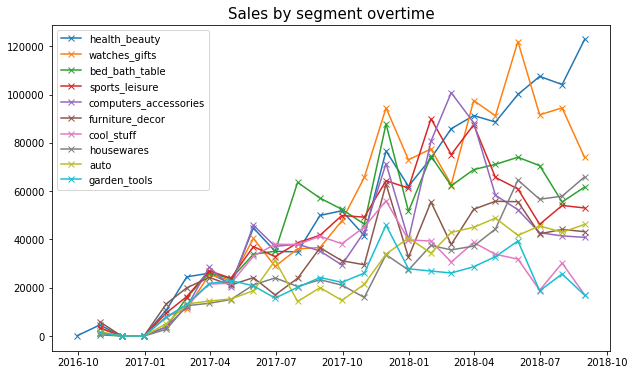

In [30]:
product = pd.merge(product[["product_id", "product_category_name"]], category, how = "left", left_on = "product_category_name", 
                   right_on = "product_category_name")

product_by_value = pd.merge(seller, product, how = "left", left_on = "product_id", right_on = "product_id")

category_sales = product_by_value.groupby("product_category_name_english").agg({"price":"sum"})
category_sales = category_sales.sort_values(by = ["price"], ascending = False)
top10 = category_sales.iloc[:10]
top10_category = top10.index
plt.figure(figsize = (10,6)) 
fancy_plot_2 = plt.subplot()
for i in top10_category:     
    order_category = product_by_value[product_by_value['product_category_name_english'] == i]  
    order_category = order_category.set_index(pd.to_datetime(order_category['order_approved_at']))  
    order_category_agg = order_category.groupby(pd.Grouper(freq = "M")).agg({"price":"sum"})     
    fancy_plot_2.plot(order_category_agg.index, order_category_agg,'-x', label = i) 
    fancy_plot_2.legend() 
    plt.title("Sales by segment overtime", size =15)

top 10 product categories that have the highest sales from Olist. Since health_beauty, computer_accessories, furniture_devor, housewares, auto, and garden_tools are also the main business segments among MQLs, the sales values from these segments also on top. 

### Recommendations

1. Continue to work on events to increse organic search traffic.

2. Learn from the successful landing pages to replicate the sucess in other landing pages.

3. New investors can invest in Health Beauty, waches gifts and bed bath as they are most successful segments.

4. Other segment sellers can investigate on health beauty to understand why they are successful, to replicate some ideas on their business.